In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import cv2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



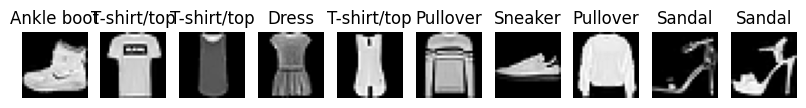

In [4]:
def plot_sample_images(images, labels, class_names, num_images=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(class_names[labels[i]])
        plt.axis('off')
    plt.show()

plot_sample_images(train_images, train_labels, class_names, num_images=10)


In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [6]:
with tf.device('/cpu:0'):
    input_shape = (28, 28, 1)

    inp_layer = tf.keras.Input(shape = input_shape)

    x = layers.Conv2D(filters= 32, kernel_size = (3,3), activation = 'relu')(inp_layer)
    x = layers.MaxPooling2D(pool_size=(2,2))(x)

    x = layers.Conv2D(filters= 32, kernel_size = (3,3), activation = 'relu')(x)
    x = layers.MaxPooling2D(pool_size=(2,2))(x)

    x = layers.Flatten()(x)


    out_layer = layers.Dense(10, activation = 'softmax')(x)

    model = tf.keras.Model(inputs = inp_layer, outputs=out_layer)

In [7]:
with tf.device('/cpu:0'):
    model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0     

In [8]:
with tf.device('/cpu:0'):
    model.compile(optimizer='Adam', loss= 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [9]:
with tf.device('/cpu:0'):
    history = model.fit(train_images, train_labels,epochs=10)

#3min 38.4secs


Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.5167 - accuracy: 0.8153
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3555 - accuracy: 0.8732
Epoch 3/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3142 - accuracy: 0.8867
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2880 - accuracy: 0.8964
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2701 - accuracy: 0.9024
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2541 - accuracy: 0.9087
Epoch 7/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2404 - accuracy: 0.9127
Epoch 8/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2305 - accuracy: 0.9166
Epoch 9/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2214 - accuracy: 0.9194
Epoch 10/10
1875/1875 [==============================] - 17s 9ms/st

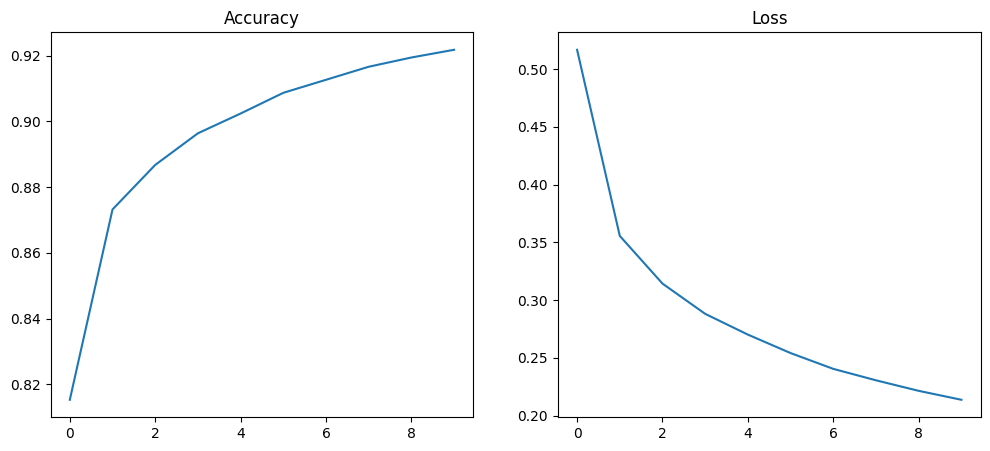

In [10]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Accuracy')
plt.plot(history.history['accuracy'])
plt.subplot(1, 2, 2)
plt.title('Loss')
plt.plot(history.history['loss'])

In [11]:
with tf.device('/cpu:0'):
    Y_pred = model.predict(test_images)
    Y_pred_labels = [np.argmax(i) for i in Y_pred]

313/313 [==============================] - 1s 2ms/step


In [12]:
print(Y_pred_labels[:50])

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 5, 1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 6, 7, 6, 7, 2, 1, 2, 6]


0.8965
0.8994920846405943


<Axes: >

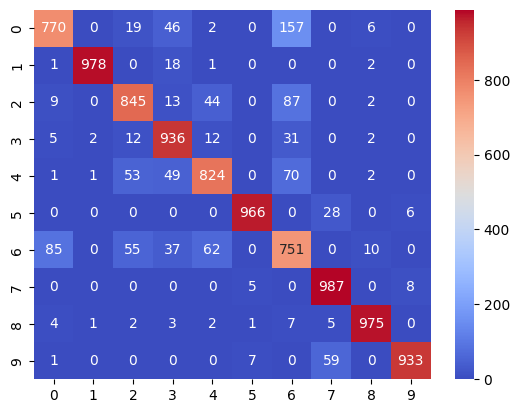

In [14]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, confusion_matrix

print(accuracy_score(test_labels, Y_pred_labels))
print(precision_score(test_labels, Y_pred_labels, average='weighted'))
cf = confusion_matrix(test_labels, Y_pred_labels)
sns.heatmap(cf, cmap = 'coolwarm', annot = True, fmt='d')

In [15]:
report = classification_report(test_labels, Y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1000
           1       1.00      0.98      0.99      1000
           2       0.86      0.84      0.85      1000
           3       0.85      0.94      0.89      1000
           4       0.87      0.82      0.85      1000
           5       0.99      0.97      0.98      1000
           6       0.68      0.75      0.71      1000
           7       0.91      0.99      0.95      1000
           8       0.98      0.97      0.98      1000
           9       0.99      0.93      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [6]:
with tf.device('/cpu:0'):

    input_shape = (28, 28, 1)

    inp_layer = tf.keras.Input(shape = input_shape)

    x = layers.Conv2D(filters= 32, kernel_size = (1,3), activation = 'relu')(inp_layer)
    x = layers.Conv2D(filters= 32, kernel_size = (3,1), activation = 'relu')(x)
    x = layers.MaxPooling2D(pool_size=(2,2))(x)

    x = layers.Conv2D(filters= 32, kernel_size = (1,3), activation = 'relu')(x)
    x = layers.Conv2D(filters= 32, kernel_size = (3,1), activation = 'relu')(x)
    x = layers.MaxPooling2D(pool_size=(2,2))(x)

    x = layers.Flatten()(x)


    out_layer = layers.Dense(10, activation = 'softmax')(x)

    model_2 = tf.keras.Model(inputs = inp_layer, outputs=out_layer)

In [7]:
with tf.device('/cpu:0'):
    model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 26, 32)        128       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        3104      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 11, 32)        3104      
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        3104      
                                                             

In [8]:
with tf.device('/cpu:0'):
    model_2.compile(optimizer='Adam', loss= 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [9]:
with tf.device('/cpu:0'):
    history_2 = model_2.fit(train_images, train_labels,epochs=10)

#7min 31.1secs

Epoch 1/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.4884 - accuracy: 0.8253
Epoch 2/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.3374 - accuracy: 0.8768
Epoch 3/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.3003 - accuracy: 0.8914
Epoch 4/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.2770 - accuracy: 0.8989
Epoch 5/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.2577 - accuracy: 0.9062
Epoch 6/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2437 - accuracy: 0.9107
Epoch 7/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2328 - accuracy: 0.9147
Epoch 8/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2208 - accuracy: 0.9191
Epoch 9/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2112 - accuracy: 0.9234
Epoch 10/10
1875/1875 [==============================] - 42s 22m

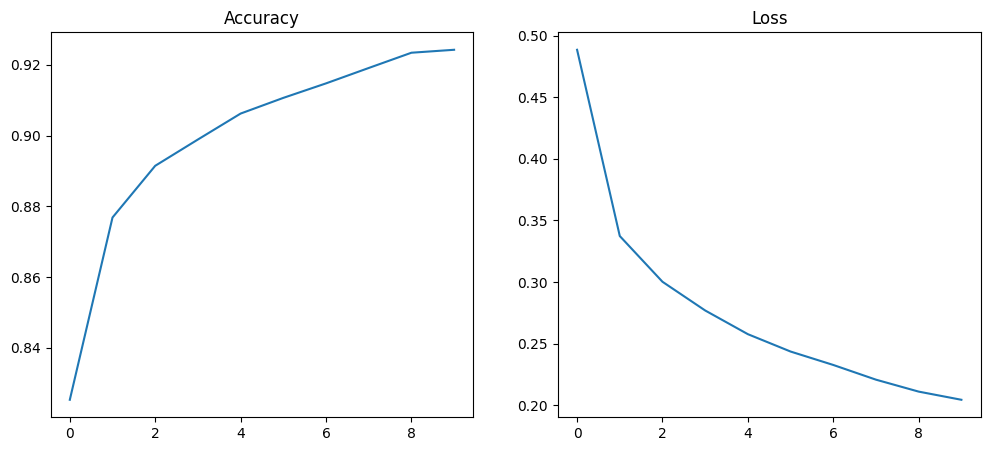

In [10]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Accuracy')
plt.plot(history_2.history['accuracy'])
plt.subplot(1, 2, 2)
plt.title('Loss')
plt.plot(history_2.history['loss'])

In [11]:
with tf.device('/cpu:0'):
    Y_pred = model_2.predict(test_images)
    Y_pred_labels = [np.argmax(i) for i in Y_pred]

313/313 [==============================] - 2s 5ms/step


In [12]:
print(Y_pred_labels[:50])

[9, 2, 1, 1, 0, 1, 4, 6, 5, 7, 4, 5, 7, 3, 2, 1, 2, 2, 8, 0, 2, 7, 7, 5, 1, 4, 6, 0, 9, 3, 8, 8, 1, 3, 8, 0, 7, 5, 7, 9, 0, 1, 0, 9, 6, 7, 2, 1, 2, 6]


0.8922
0.8956097354506611


<Axes: >

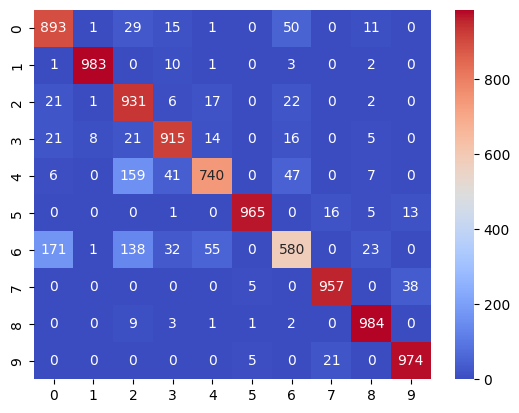

In [13]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, confusion_matrix

print(accuracy_score(test_labels, Y_pred_labels))
print(precision_score(test_labels, Y_pred_labels, average='weighted'))
cf = confusion_matrix(test_labels, Y_pred_labels)
sns.heatmap(cf, cmap = 'coolwarm', annot = True, fmt='d')

In [6]:
with tf.device('/cpu:0'):

    input_shape = (28, 28, 1)

    inp_layer = tf.keras.Input(shape = input_shape)

    x = layers.Conv2D(filters= 32, kernel_size = (6,7), activation = 'relu')(inp_layer)
    x = layers.MaxPooling2D(pool_size=(2,2))(x)



    x = layers.Flatten()(x)


    out_layer = layers.Dense(10, activation = 'softmax')(x)

    model_3 = tf.keras.Model(inputs = inp_layer, outputs=out_layer)

In [7]:
with tf.device('/cpu:0'):
    model_3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 23, 22, 32)        1376      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3872)              0         
                                                                 
 dense (Dense)               (None, 10)                38730     
                                                                 
Total params: 40,106
Trainable params: 40,106
Non-trainable params: 0
_________________________________________________________

In [8]:
with tf.device('/cpu:0'):
    model_3.compile(optimizer='Adam', loss= 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [9]:
with tf.device('/cpu:0'):
    history_3 = model_3.fit(train_images, train_labels,epochs=10)



Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4715 - accuracy: 0.8337
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3367 - accuracy: 0.8801
Epoch 3/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.2973 - accuracy: 0.8929
Epoch 4/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2718 - accuracy: 0.9035
Epoch 5/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2514 - accuracy: 0.9095
Epoch 6/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2358 - accuracy: 0.9151
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2209 - accuracy: 0.9195
Epoch 8/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2097 - accuracy: 0.9229
Epoch 9/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2002 - accuracy: 0.9270
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/st

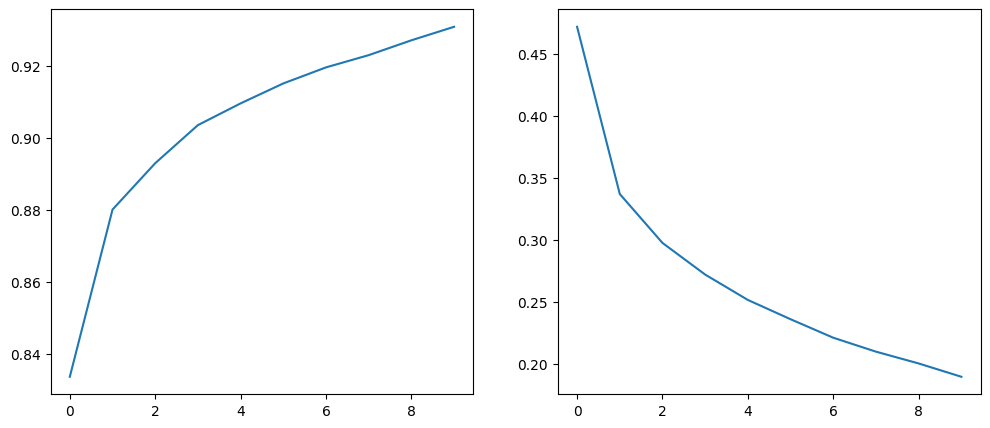

In [10]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(history_3.history['accuracy'])
plt.subplot(1, 2, 2)
plt.plot(history_3.history['loss'])

In [11]:
with tf.device('/cpu:0'):
    Y_pred = model_3.predict(test_images)
    Y_pred_labels = [np.argmax(i) for i in Y_pred]

313/313 [==============================] - 1s 3ms/step


In [12]:
print(Y_pred_labels[:50])

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 6, 8, 0, 2, 5, 7, 5, 1, 6, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 6, 7, 6, 7, 2, 1, 2, 6]


0.8968
0.903429337993144


<Axes: >

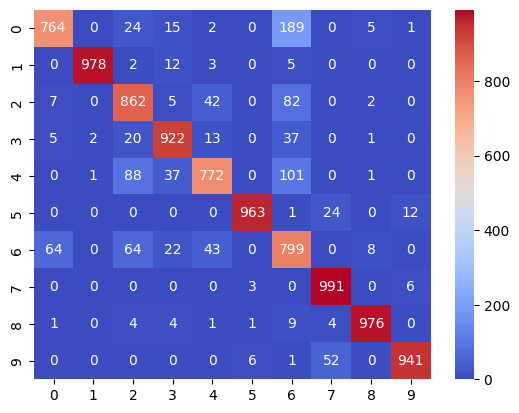

In [13]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, confusion_matrix

print(accuracy_score(test_labels, Y_pred_labels))
print(precision_score(test_labels, Y_pred_labels, average='weighted'))
cf = confusion_matrix(test_labels, Y_pred_labels)
sns.heatmap(cf, cmap = 'coolwarm', annot = True, fmt='d')

In [14]:
report = classification_report(test_labels, Y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.76      0.83      1000
           1       1.00      0.98      0.99      1000
           2       0.81      0.86      0.84      1000
           3       0.91      0.92      0.91      1000
           4       0.88      0.77      0.82      1000
           5       0.99      0.96      0.98      1000
           6       0.65      0.80      0.72      1000
           7       0.93      0.99      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.94      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [6]:
with tf.device('/cpu:0'):

    input_shape = (28, 28, 1)

    inp_layer = tf.keras.Input(shape = input_shape)

    x = layers.Conv2D(filters= 32, kernel_size = (6,1), activation = 'relu')(inp_layer)
    x = layers.Conv2D(filters= 32, kernel_size = (1,7), activation = 'relu')(x)
    x = layers.MaxPooling2D(pool_size=(2,2))(x)



    x = layers.Flatten()(x)


    out_layer = layers.Dense(10, activation = 'softmax')(x)

    model_4 = tf.keras.Model(inputs = inp_layer, outputs=out_layer)

In [7]:
with tf.device('/cpu:0'):
    model_4.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 23, 28, 32)        224       
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 22, 32)        7200      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3872)              0         
                                                                 
 dense (Dense)               (None, 10)                38730     
                                                             

In [8]:
with tf.device('/cpu:0'):
    model_4.compile(optimizer='Adam', loss= 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [9]:
with tf.device('/cpu:0'):
    history_4 = model_4.fit(train_images, train_labels,epochs=10)


Epoch 1/10
1875/1875 [==============================] - 58s 29ms/step - loss: 0.4500 - accuracy: 0.8387
Epoch 2/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.3092 - accuracy: 0.8888
Epoch 3/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.2692 - accuracy: 0.9011
Epoch 4/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.2385 - accuracy: 0.9140
Epoch 5/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.2143 - accuracy: 0.9215
Epoch 6/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.1956 - accuracy: 0.9286
Epoch 7/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.1795 - accuracy: 0.9328
Epoch 8/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.1676 - accuracy: 0.9381
Epoch 9/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1554 - accuracy: 0.9438
Epoch 10/10
1875/1875 [==============================] - 39s 21m

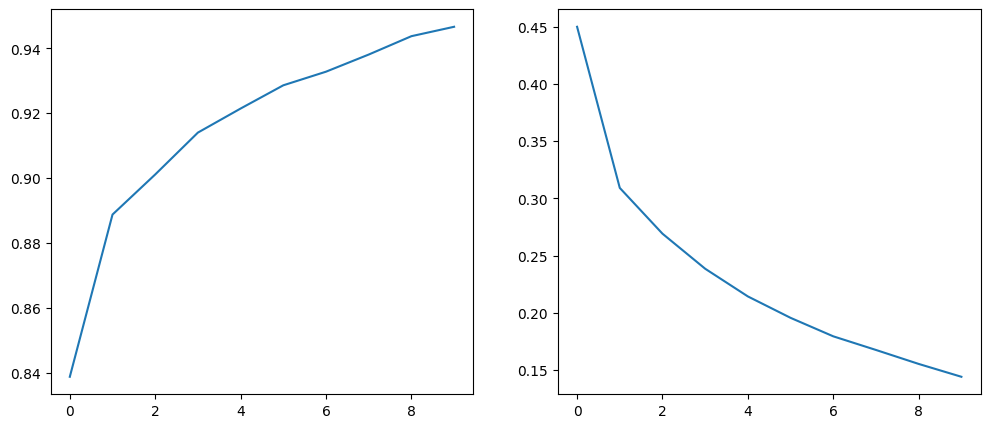

In [10]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(history_4.history['accuracy'])
plt.subplot(1, 2, 2)
plt.plot(history_4.history['loss'])

In [11]:
Y_pred = model_4.predict(test_images)
Y_pred_labels = [np.argmax(i) for i in Y_pred]

313/313 [==============================] - 5s 2ms/step


In [12]:
print(Y_pred_labels[:50])

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 6, 8, 0, 2, 5, 7, 5, 1, 2, 6, 0, 9, 3, 8, 8, 1, 3, 8, 0, 7, 5, 7, 9, 0, 1, 0, 7, 6, 7, 2, 1, 6, 6]


0.9065
0.9070482430165661


<Axes: >

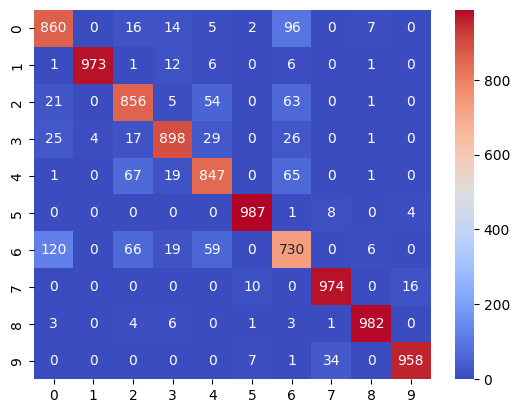

In [13]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, confusion_matrix

print(accuracy_score(test_labels, Y_pred_labels))
print(precision_score(test_labels, Y_pred_labels, average='weighted'))
cf = confusion_matrix(test_labels, Y_pred_labels)
sns.heatmap(cf, cmap = 'coolwarm', annot = True, fmt='d')

In [14]:
report = classification_report(test_labels, Y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1000
           1       1.00      0.97      0.98      1000
           2       0.83      0.86      0.84      1000
           3       0.92      0.90      0.91      1000
           4       0.85      0.85      0.85      1000
           5       0.98      0.99      0.98      1000
           6       0.74      0.73      0.73      1000
           7       0.96      0.97      0.97      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

